# Testing

### Test Driven Development:
    1. write tests
    2. make them fail
    3. write code
    4. make them pass
    5. repeat

## Unittest

1. every test class must be derived from *unittest.TestCase*
2. every test function name must have prefix *test_*
3. use *assert* functions to check result
4. use *setUp()* for initialization before test case
5. use *tearDown()* for code executed after test case
6. python -m unittest -v test_module


# Profiling

is a form of dynamic program analysis that measures, for example, the space (memory) or time complexity of a program, the usage of particular instructions, or the frequency and duration of function calls [Wikipedia]

## Manual profiling 

In [1]:
def fibonacci_1(n):
    a, b = 0, 1
    
    if n < 0:
        raise Exception()
    elif n == 0:
        return a
    elif n == 1:
        return b
    
    x = 1
    for i in range(n-2):
        x, b, a = x+b, x, b
    return x
    
def fibonacci_2(n):
    if n < 0:
        raise Exception()
    elif n == 0:
        return 0
    elif n == 1:
        return 1
    
    return fibonacci_2(n-1) + fibonacci_2(n-2)

In [2]:
import time

def manual_profile(foo, x):
    time_start = time.time()
    foo(x)
    return time.time() - time_start

manual_profile(fibonacci_1,20), manual_profile(fibonacci_2,20)

(1.0251998901367188e-05, 0.006666421890258789)

In [3]:
### timeit decorator
import time


def timeit(foo, *args, **kwags):
    def wrap(*args, **kwags):
        time_start = time.time()
        result = foo(*args, **kwags)
        print('%s took %f.6 sec' % (foo.__name__, time.time() - time_start))
        return result
    return wrap

@timeit
def fibonacci_1(n):
    a, b = 0, 1
    
    if n < 0:
        raise Exception()
    elif n == 0:
        return a
    elif n == 1:
        return b
    
    x = 1
    for i in range(n-2):
        x, b, a = x+b, x, b
    return x

fibonacci_1(20)

fibonacci_1 took 0.000008.6 sec


6765

### Magic commands in jupyter notebook

In [4]:
%time fibonacci_2(20)

CPU times: user 12 ms, sys: 0 ns, total: 12 ms
Wall time: 8.13 ms


6765

In [5]:
%timeit -n 1 fibonacci_1(20)

fibonacci_1 took 0.000015.6 sec
fibonacci_1 took 0.000011.6 sec
fibonacci_1 took 0.000009.6 sec
fibonacci_1 took 0.000008.6 sec
fibonacci_1 took 0.000008.6 sec
fibonacci_1 took 0.000008.6 sec
fibonacci_1 took 0.000008.6 sec
The slowest run took 8.03 times longer than the fastest. This could mean that an intermediate result is being cached.
528 µs ± 609 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)


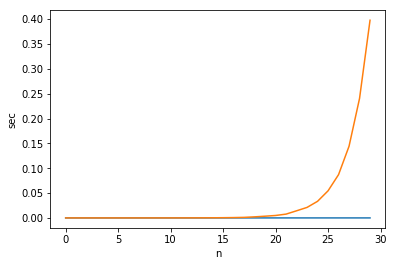

In [6]:
def fibonacci_1(n):
    a, b = 0, 1
    
    if n < 0:
        raise Exception()
    elif n == 0:
        return a
    elif n == 1:
        return b
    
    x = 1
    for i in range(n-2):
        x, b, a = x+b, x, b
    return x
    
def fibonacci_2(n):
    if n < 0:
        raise Exception()
    elif n == 0:
        return 0
    elif n == 1:
        return 1
    
    return fibonacci_2(n-1) + fibonacci_2(n-2)

import time

def manual_profile(foo, x):
    time_start = time.time()
    foo(x)
    return time.time() - time_start

# draw plot
import matplotlib.pylab as plt
%matplotlib inline

n = range(30)
time_spend_1 = [manual_profile(fibonacci_1, x) for x in n]
time_spend_2 = [manual_profile(fibonacci_2, x) for x in n]

# import numpy as np
# time_spend_1 = np.log(time_spend_1)
# time_spend_2 = np.log(time_spend_2)

plt.plot(n, time_spend_1, label='O(n)')
plt.plot(n, time_spend_2, label='O(2^n)')
plt.xlabel('n')
plt.ylabel('sec')
plt.show()

### cProfile

In [8]:
! python -m cProfile -s time profiling_case1.py

Filename: profiling_case1.py

Line #    Mem usage    Increment   Line Contents
     3     40.0 MiB      0.0 MiB   @profile
     4                             def bubble_sort(a):
     5     40.0 MiB      0.0 MiB   	for j in range(len(a)-1, 0, -1):
     6     40.0 MiB      0.0 MiB   		for i in range(j):
     7     40.0 MiB      0.0 MiB   			if a[i]>a[i+1]:
     8     40.0 MiB      0.0 MiB   				a[i], a[i+1] = a[i+1], a[i]
     9     40.0 MiB      0.0 MiB   	return a


         341557 function calls (333989 primitive calls) in 126.160 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1  125.475  125.475  125.475  125.475 profiling_case1.py:3(bubble_sort)
      425    0.067    0.000    0.067    0.000 {built-in method marshal.loads}
    614/1    0.044    0.000  126.162  126.162 {built-in method builtins.exec}
1419/1415    0.034    0.000    0.187    0.000 {built-in method builtins.__build_class__}
       81    0.018    0.00

        1    0.000    0.000    0.000    0.000 bdb.py:644(Tdb)
        1    0.000    0.000    0.000    0.000 iterable.py:45(IterableMixin)
        1    0.000    0.000    0.000    0.000 threading.py:1156(Timer)
        2    0.000    0.000    0.000    0.000 __init__.py:415(__init__)
        1    0.000    0.000    0.000    0.000 vi.py:49(TextObjectType)
        1    0.000    0.000    0.000    0.000 __future__.py:78(_Feature)
        1    0.000    0.000    0.000    0.000 autocall.py:31(IPyAutocall)
        6    0.000    0.000    0.000    0.000 <frozen importlib._bootstrap>:762(is_package)
        1    0.000    0.000    0.000    0.000 __init__.py:597(BufferingFormatter)
        1    0.000    0.000    0.000    0.000 controls.py:363(FillControl)
        1    0.000    0.000    0.000    0.000 macro.py:16(Macro)
        1    0.000    0.000    0.000    0.000 reactive.py:48(_IntegerFromCallable)
        1    0.000    0.000    0.000    0.000 typing.py:404(_Any)
        1    0.000    0.000    0.000  

### pstats

In [10]:
%%bash 
python -m cProfile -s time -o case1.prof profiling_case1.py
python -m cProfile -s time -o case2.prof profiling_case2.py

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [12]:
! ls -l

total 2472
-rw-rw-r-- 1 denaas denaas  50077 сен 19 11:13 animation_example.ipynb
-rw-rw-r-- 1 denaas denaas 402444 сен 19 11:20 case1.prof
-rw-rw-r-- 1 denaas denaas 402763 сен 19 11:22 case2.prof
-rw-rw-r-- 1 denaas denaas 646338 сен 19 11:20 gradientdescent.ipynb
drwxrwxr-x 2 denaas denaas   4096 сен 19 11:01 images
-rwxrwxrwx 1 denaas denaas    313 сен 19 11:11 profiling_case1.py
-rwxrwxrwx 1 denaas denaas    708 мар 25 01:10 profiling_case2.py
-rwxrwxrwx 1 denaas denaas    556 мар 25 01:10 profiling_case3.py
-rw-rw-r-- 1 denaas denaas 711243 сен 18 22:30 recap.pdf
-rwxrwxrwx 1 denaas denaas 274230 сен 19 11:18 test_and_profile.ipynb
-rwxrwxrwx 1 denaas denaas    446 мар 25 01:10 test_real_numbers.py
-rw-rw-r-- 1 denaas denaas    613 сен 19 10:14 Untitled1.ipynb
-rw-rw-r-- 1 denaas denaas   3468 сен 18 22:59 Untitled.ipynb


In [13]:
import pstats
p = pstats.Stats('case2.prof')
p.sort_stats('cumtime').print_stats()

Wed Sep 19 11:22:07 2018    case2.prof

         38990583 function calls (38963017 primitive calls) in 115.143 seconds

   Ordered by: cumulative time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
    614/1    0.051    0.000  116.152  116.152 {built-in method builtins.exec}
        1    0.000    0.000  116.152  116.152 profiling_case2.py:1(<module>)
  19999/1    0.118    0.000  115.379  115.379 profiling_case2.py:25(merge_sort)
     9999    0.149    0.000  115.258    0.012 /opt/anaconda3/lib/python3.5/site-packages/memory_profiler.py:1052(wrapper)
     9999    0.220    0.000   73.293    0.007 /opt/anaconda3/lib/python3.5/site-packages/memory_profiler.py:643(f)
     9999   72.636    0.007   72.815    0.007 profiling_case2.py:3(merge)
     9999    0.106    0.000   39.611    0.004 /opt/anaconda3/lib/python3.5/site-packages/memory_profiler.py:612(__call__)
     9999    0.036    0.000   39.472    0.004 /opt/anaconda3/lib/python3.5/site-packages/memory_profiler.py:

     4675    0.007    0.000    0.010    0.000 <frozen importlib._bootstrap_external>:59(<listcomp>)
      451    0.002    0.000    0.010    0.000 <frozen importlib._bootstrap_external>:372(_get_cached)
        1    0.000    0.000    0.010    0.010 /opt/anaconda3/lib/python3.5/site-packages/prompt_toolkit/styles/__init__.py:3(<module>)
        1    0.000    0.000    0.010    0.010 /opt/anaconda3/lib/python3.5/site-packages/IPython/core/magics/execution.py:166(ExecutionMagics)
        1    0.000    0.000    0.010    0.010 /opt/anaconda3/lib/python3.5/site-packages/colorama/initialise.py:2(<module>)
        1    0.000    0.000    0.010    0.010 /opt/anaconda3/lib/python3.5/site-packages/prompt_toolkit/filters/__init__.py:30(<module>)
      136    0.007    0.000    0.010    0.000 /opt/anaconda3/lib/python3.5/textwrap.py:233(_wrap_chunks)
        1    0.000    0.000    0.010    0.010 /opt/anaconda3/lib/python3.5/site-packages/jedi/evaluate/compiled/context.py:3(<module>)
        1    0.000 

     1961    0.001    0.000    0.001    0.000 /opt/anaconda3/lib/python3.5/sre_parse.py:153(__len__)
        1    0.000    0.000    0.001    0.001 /opt/anaconda3/lib/python3.5/site-packages/IPython/paths.py:2(<module>)
        1    0.000    0.000    0.001    0.001 /opt/anaconda3/lib/python3.5/site-packages/IPython/core/application.py:102(BaseIPythonApplication)
        1    0.000    0.000    0.001    0.001 /opt/anaconda3/lib/python3.5/site-packages/colorama/ansitowin32.py:43(AnsiToWin32)
        1    0.000    0.000    0.001    0.001 /opt/anaconda3/lib/python3.5/lzma.py:9(<module>)
       22    0.000    0.000    0.001    0.000 /opt/anaconda3/lib/python3.5/argparse.py:1346(add_argument_group)
        1    0.000    0.000    0.001    0.001 /opt/anaconda3/lib/python3.5/site-packages/IPython/core/magics/extension.py:24(ExtensionMagics)
        1    0.000    0.000    0.001    0.001 /opt/anaconda3/lib/python3.5/site-packages/six.py:21(<module>)
      425    0.001    0.000    0.001    0.000 <fr

        1    0.000    0.000    0.000    0.000 /opt/anaconda3/lib/python3.5/pathlib.py:366(_NormalAccessor)
     1535    0.000    0.000    0.000    0.000 {built-in method builtins.ord}
        3    0.000    0.000    0.000    0.000 /opt/anaconda3/lib/python3.5/site-packages/IPython/core/magic.py:212(_function_magic_marker)
      130    0.000    0.000    0.000    0.000 /opt/anaconda3/lib/python3.5/site-packages/pygments/token.py:25(__init__)
       15    0.000    0.000    0.000    0.000 /opt/anaconda3/lib/python3.5/enum.py:121(<setcomp>)
        5    0.000    0.000    0.000    0.000 /opt/anaconda3/lib/python3.5/inspect.py:2744(from_callable)
        1    0.000    0.000    0.000    0.000 /opt/anaconda3/lib/python3.5/site-packages/psutil/_pslinux.py:574(cpu_times)
       78    0.000    0.000    0.000    0.000 /opt/anaconda3/lib/python3.5/re.py:323(_subx)
      342    0.000    0.000    0.000    0.000 /opt/anaconda3/lib/python3.5/site-packages/traitlets/traitlets.py:383(class_init)
        1 

        1    0.000    0.000    0.000    0.000 /opt/anaconda3/lib/python3.5/site-packages/IPython/utils/contexts.py:3(<module>)
        3    0.000    0.000    0.000    0.000 /opt/anaconda3/lib/python3.5/site-packages/psutil/_common.py:279(memoize)
        1    0.000    0.000    0.000    0.000 /opt/anaconda3/lib/python3.5/site-packages/jedi/api/project.py:1(<module>)
        1    0.000    0.000    0.000    0.000 /opt/anaconda3/lib/python3.5/site-packages/IPython/core/excolors.py:18(exception_colors)
       11    0.000    0.000    0.000    0.000 /opt/anaconda3/lib/python3.5/site-packages/traitlets/config/loader.py:252(__getitem__)
       11    0.000    0.000    0.000    0.000 /opt/anaconda3/lib/python3.5/site-packages/IPython/core/magic_arguments.py:102(add_usage)
        2    0.000    0.000    0.000    0.000 /opt/anaconda3/lib/python3.5/logging/__init__.py:1138(getLogger)
        1    0.000    0.000    0.000    0.000 /opt/anaconda3/lib/python3.5/site-packages/prompt_toolkit/clipboard/in_

       54    0.000    0.000    0.000    0.000 /opt/anaconda3/lib/python3.5/site-packages/traitlets/traitlets.py:900(_init_call)
        2    0.000    0.000    0.000    0.000 /opt/anaconda3/lib/python3.5/datetime.py:1030(__new__)
        1    0.000    0.000    0.000    0.000 /opt/anaconda3/lib/python3.5/site-packages/pygments/lexers/python.py:748(DgLexer)
        1    0.000    0.000    0.000    0.000 /opt/anaconda3/lib/python3.5/site-packages/IPython/core/prefilter.py:583(MagicHandler)
        9    0.000    0.000    0.000    0.000 /opt/anaconda3/lib/python3.5/site-packages/jedi/evaluate/filters.py:445(decorator)
        1    0.000    0.000    0.000    0.000 /opt/anaconda3/lib/python3.5/site-packages/IPython/core/magics/script.py:27(script_args)
        6    0.000    0.000    0.000    0.000 /opt/anaconda3/lib/python3.5/typing.py:800(<genexpr>)
        1    0.000    0.000    0.000    0.000 /opt/anaconda3/lib/python3.5/site-packages/backcall/backcall.py:6(<module>)
        1    0.000    0.

        1    0.000    0.000    0.000    0.000 <string>:5(pthread)
        1    0.000    0.000    0.000    0.000 /opt/anaconda3/lib/python3.5/site-packages/jedi/evaluate/context/iterable.py:440(FakeDict)
        1    0.000    0.000    0.000    0.000 /opt/anaconda3/lib/python3.5/site-packages/jedi/evaluate/context/instance.py:369(InstanceClassFilter)
       19    0.000    0.000    0.000    0.000 /opt/anaconda3/lib/python3.5/argparse.py:587(<listcomp>)
        1    0.000    0.000    0.000    0.000 /opt/anaconda3/lib/python3.5/site-packages/jedi/api/__init__.py:45(Script)
        1    0.000    0.000    0.000    0.000 <string>:5(DefragResult)
        1    0.000    0.000    0.000    0.000 <string>:5(Point)
        1    0.000    0.000    0.000    0.000 /opt/anaconda3/lib/python3.5/urllib/parse.py:142(_NetlocResultMixinBase)
       69    0.000    0.000    0.000    0.000 {built-in method builtins.globals}
        1    0.000    0.000    0.000    0.000 /opt/anaconda3/lib/python3.5/site-packages/p

        1    0.000    0.000    0.000    0.000 /opt/anaconda3/lib/python3.5/tokenize.py:224(Untokenizer)
        1    0.000    0.000    0.000    0.000 /opt/anaconda3/lib/python3.5/string.py:174(Formatter)
        1    0.000    0.000    0.000    0.000 /opt/anaconda3/lib/python3.5/site-packages/prompt_toolkit/styles/from_pygments.py:60(PygmentsStyle)
        1    0.000    0.000    0.000    0.000 {method 'seek' of '_io.BufferedReader' objects}
        1    0.000    0.000    0.000    0.000 /opt/anaconda3/lib/python3.5/site-packages/IPython/terminal/debugger.py:22(TerminalPdb)
        1    0.000    0.000    0.000    0.000 /opt/anaconda3/lib/python3.5/site-packages/IPython/core/ultratb.py:555(ListTB)
        1    0.000    0.000    0.000    0.000 /opt/anaconda3/lib/python3.5/site-packages/jedi/api/keywords.py:34(Keyword)
        1    0.000    0.000    0.000    0.000 /opt/anaconda3/lib/python3.5/site-packages/jedi/evaluate/context/module.py:29(ModuleName)
        1    0.000    0.000    0.000   

        1    0.000    0.000    0.000    0.000 /opt/anaconda3/lib/python3.5/site-packages/traitlets/traitlets.py:614(info)
        1    0.000    0.000    0.000    0.000 <decorator-gen-47>:1(<module>)
        1    0.000    0.000    0.000    0.000 /opt/anaconda3/lib/python3.5/queue.py:233(LifoQueue)
        2    0.000    0.000    0.000    0.000 {method 'values' of 'dict' objects}
        1    0.000    0.000    0.000    0.000 /opt/anaconda3/lib/python3.5/__future__.py:78(_Feature)
        1    0.000    0.000    0.000    0.000 /opt/anaconda3/lib/python3.5/site-packages/prompt_toolkit/filters/types.py:17(_FilterTypeMeta)
        1    0.000    0.000    0.000    0.000 /opt/anaconda3/lib/python3.5/site-packages/prompt_toolkit/validation.py:18(ValidationError)
        1    0.000    0.000    0.000    0.000 /opt/anaconda3/lib/python3.5/urllib/parse.py:246(DefragResult)
        1    0.000    0.000    0.000    0.000 <decorator-gen-110>:1(<module>)
        3    0.000    0.000    0.000    0.000 {metho

        1    0.000    0.000    0.000    0.000 /opt/anaconda3/lib/python3.5/site-packages/prompt_toolkit/utils.py:143(_CharSizesCache)
        1    0.000    0.000    0.000    0.000 /opt/anaconda3/lib/python3.5/multiprocessing/context.py:16(BufferTooShort)
        1    0.000    0.000    0.000    0.000 /opt/anaconda3/lib/python3.5/site-packages/prompt_toolkit/filters/cli.py:119(IsReadOnly)
        1    0.000    0.000    0.000    0.000 <decorator-gen-114>:1(<module>)
        1    0.000    0.000    0.000    0.000 /opt/anaconda3/lib/python3.5/typing.py:1412(__init__)
        1    0.000    0.000    0.000    0.000 /opt/anaconda3/lib/python3.5/site-packages/IPython/lib/pretty.py:426(Printable)
        1    0.000    0.000    0.000    0.000 /opt/anaconda3/lib/python3.5/pickle.py:74(UnpicklingError)
        1    0.000    0.000    0.000    0.000 <decorator-gen-62>:1(<module>)
        1    0.000    0.000    0.000    0.000 /opt/anaconda3/lib/python3.5/site-packages/prompt_toolkit/filters/cli.py:341(V

        1    0.000    0.000    0.000    0.000 /opt/anaconda3/lib/python3.5/site-packages/traitlets/config/loader.py:36(ArgumentError)
        1    0.000    0.000    0.000    0.000 /opt/anaconda3/lib/python3.5/site-packages/pygments/filters/__init__.py:171(RaiseOnErrorTokenFilter)
        1    0.000    0.000    0.000    0.000 /opt/anaconda3/lib/python3.5/site-packages/psutil/_exceptions.py:81(TimeoutExpired)
        1    0.000    0.000    0.000    0.000 /opt/anaconda3/lib/python3.5/multiprocessing/context.py:208(Process)
        1    0.000    0.000    0.000    0.000 <decorator-gen-74>:1(<module>)
        1    0.000    0.000    0.000    0.000 /opt/anaconda3/lib/python3.5/ctypes/__init__.py:171(c_long)
        1    0.000    0.000    0.000    0.000 /opt/anaconda3/lib/python3.5/site-packages/pygments/filter.py:56(FunctionFilter)
        1    0.000    0.000    0.000    0.000 /opt/anaconda3/lib/python3.5/site-packages/IPython/terminal/embed.py:22(KillEmbedded)
        1    0.000    0.000    0

        1    0.000    0.000    0.000    0.000 /opt/anaconda3/lib/python3.5/site-packages/pygments/filters/__init__.py:126(NameHighlightFilter)
        1    0.000    0.000    0.000    0.000 /opt/anaconda3/lib/python3.5/http/client.py:1288(UnknownTransferEncoding)
        1    0.000    0.000    0.000    0.000 /opt/anaconda3/lib/python3.5/http/client.py:1280(InvalidURL)
        1    0.000    0.000    0.000    0.000 <decorator-gen-37>:1(<module>)
        1    0.000    0.000    0.000    0.000 /opt/anaconda3/lib/python3.5/threading.py:718(BrokenBarrierError)
        1    0.000    0.000    0.000    0.000 /opt/anaconda3/lib/python3.5/site-packages/prompt_toolkit/terminal/__init__.py:1(<module>)
        1    0.000    0.000    0.000    0.000 /opt/anaconda3/lib/python3.5/threading.py:1186(_MainThread)
        1    0.000    0.000    0.000    0.000 /opt/anaconda3/lib/python3.5/argparse.py:1048(_ChoicesPseudoAction)
        1    0.000    0.000    0.000    0.000 /opt/anaconda3/lib/python3.5/site-pack

In [109]:
import random

random.seed(1337)
a = [str(random.randint(0,10000)) for x in range(1000)]
%timeit a.index(a[-1])

29.7 µs ± 213 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [106]:
random.seed(1337)
a = {str(random.randint(0,10000)):x for x in range(1000)}
%timeit a[list(a.keys())[-1]]
# a.keys()

6.61 µs ± 64.5 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


### pycallgraph

In [112]:
%%bash
# pip install pycallgraph
pycallgraph graphviz -- profiling_case2.py

### memory profiler

In [126]:
%%bash
# pip install memory_profiler

In [127]:
%%bash
python -m memory_profiler profiling_case3.py

Filename: profiling_case3.py

Line #    Mem usage    Increment   Line Contents
    22     47.2 MiB      0.0 MiB   @profile
    23                             def main():
    24     47.2 MiB      0.0 MiB   	import random
    25     47.2 MiB      0.0 MiB   	random.seed(1337)
    26     47.2 MiB      0.0 MiB   	s = Storage()
    27     85.4 MiB     38.1 MiB   	for x in range(10):
    28     85.4 MiB      0.0 MiB   		s.update(str(random.randint(0, 10)), [random.randint(0, 1000)]*1000000)
    29     85.4 MiB      0.0 MiB   		s.delete(str(random.randint(0, 10)))


